In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from qupath_filter_viz_functions import coordFilter, channelFilter, clusterFilter, stackedBar, imageMask, emptyMatrixViz

In [2]:
df = pd.read_csv('test files\hdb_results.csv')
df = df.sort_values(by='ratio_red',ascending=False)

In [12]:
df.head()

cell index  centroid_x  centroid_y  channel_nucleus  nucleus_area  \
0  cell_6830        1373        2788       17502.9902         73.08   
1  cell_6252        1261        2557       25920.4844         87.48   
2  cell_6105        1010        2502       40652.6992         69.48   
3  cell_6435         587        2639       33203.6133        104.40   
4  cell_4400        2792        1826       22549.3457        106.20   

   nucleus_circularity  channel_red  channel_green  channel_blue  channel_sum  \
0               0.7786   23001.1152      1128.2632      485.5311   24614.9095   
1               0.9037   34966.1758      1841.2782      708.1855   37515.6395   
2               0.9452   34621.3516      1813.3815      716.5516   37151.2847   
3               0.7771   27918.5547      1463.8356      607.0137   29989.4040   
4               0.8531   25000.5566      1246.1711      615.6745   26862.4022   

   ...  ratio_blue     rgb_red  rgb_green  rgb_blue   rel_red  rel_green  \
0  ...    0.019725  238.281777  11.688327  5.029896  0.353174   0.018233   
1  ...    0.018877  237.670874  12.515472  4.813654  0.536893   0.029755   
2  ...    0.019287  237.634976  12.446737  4.918286  0.531598   0.029304   
3  ...    0.020241  237.391562  12.446999  5.161439  0.428679   0.023655   
4  ...    0.022920  237.325831  11.829680  5.844488  0.383874   0.020138   

   rel_blue  c_label  c_probability  cluster_bool  
0  0.007410       -1            NaN             N  
1  0.010808       -1            NaN             N  
2  0.010936       -1            NaN             N  
3  0.009264       -1            NaN             N  
4  0.009396       -1            NaN             N  

[5 rows x 22 columns]

In [13]:
#cluster Filter takes a dataframe as argument and returns dataframe with bool column
df = clusterFilter(df)

filter clusters: 9


Loading BokehJS ...

df filter column: cluster_bool


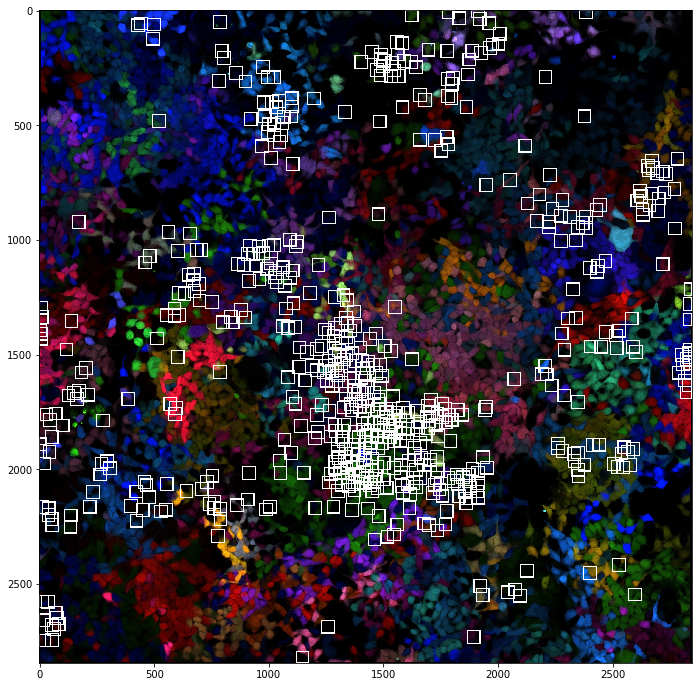

In [15]:
#used stacked bar and image mask functions to filter by bool column and retrun stacked bar and mask image

image = np.array(Image.open('test files\detected_image.jpg'))
imageMask(image,df[df['cluster_bool']=='Y'])

stackedBar(df,True)

100%|███████████████████████████████████████████████████████████████████████████████| 619/619 [00:00<00:00, 676.45it/s]


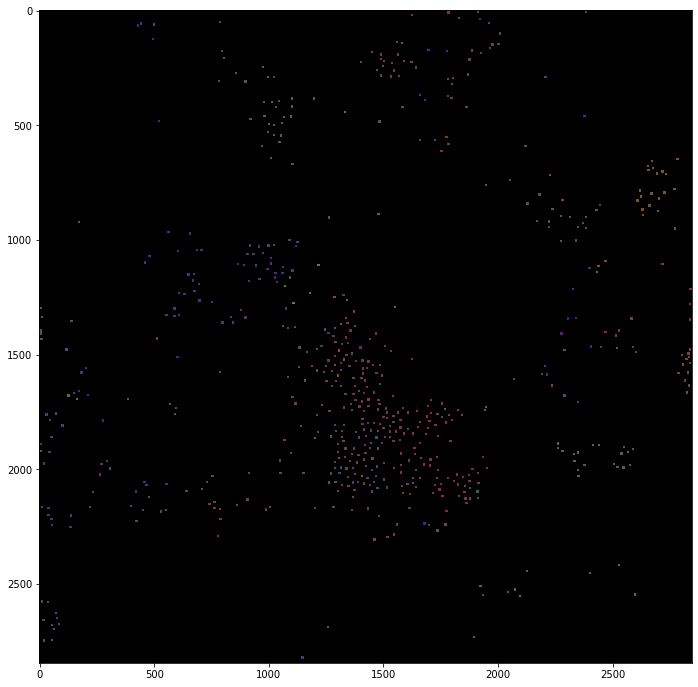

In [17]:
#emptyMatrivViz function returns image of empty matrix with cells visualized as RGB points
emptyMatrixViz(df[df['cluster_bool']=='Y'])

In [19]:
#use stackedBar to show cluster values only
stackedBar(df[df['cluster_bool']=='Y'],False)

Loading BokehJS ...

In [20]:
#use coordFilter to return dataframe with additional bool column
df2 = coordFilter(df[df['cluster_bool']=='Y'])

x limits: 1000 2000
y limits: 1300 2300


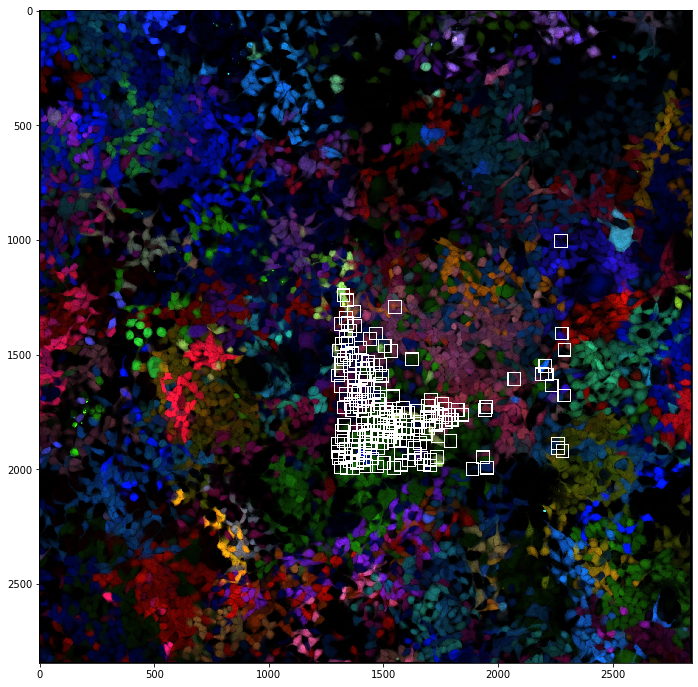

In [22]:
image = np.array(Image.open('test files\detected_image.jpg'))
imageMask(image,df2[df2['coord_bool']=='Y'])

In [23]:
stackedBar(df2,True)

Loading BokehJS ...

df filter column: coord_bool


In [26]:
#use channelFilter to return dataframe with additional bool column
df2 = channelFilter(df2)

Enter "and" for conjunction or "or" for disjunction of parameters: and
red filter: 0.5 1
green filter: 0 1
blue filter: 0 1


In [11]:
df2

cell index  centroid_x  centroid_y  channel_nucleus  nucleus_area  \
6830  cell_6830        1373        2788       17502.9902         73.08   
6252  cell_6252        1261        2557       25920.4844         87.48   
6105  cell_6105        1010        2502       40652.6992         69.48   
6435  cell_6435         587        2639       33203.6133        104.40   
4400  cell_4400        2792        1826       22549.3457        106.20   
...         ...         ...         ...              ...           ...   
1289  cell_1289         796         562       25493.2812        111.24   
4754  cell_4754         307        1966       13896.8779         55.44   
5295  cell_5295        2395        2175       43411.5117         34.20   
4860  cell_4860        2696        2004       23002.2871         63.72   
4994  cell_4994        2714        2060       28250.1152        102.96   

      nucleus_circularity  channel_red  channel_green  channel_blue  \
6830               0.7786   23001.1152      1128.2632      485.5311   
6252               0.9037   34966.1758      1841.2782      708.1855   
6105               0.9452   34621.3516      1813.3815      716.5516   
6435               0.7771   27918.5547      1463.8356      607.0137   
4400               0.8531   25000.5566      1246.1711      615.6745   
...                   ...          ...            ...           ...   
1289               0.9092     169.7055      3964.3269    51047.6328   
4754               0.8446     139.2115      3615.8782    45542.0625   
5295               0.7324     170.7500      6640.6602    65524.3594   
4860               0.8949     166.3094      5651.0444    65360.0039   
4994               0.9052     160.5903      7923.0728    65517.3594   

      channel_sum  ...  ratio_blue     rgb_red  rgb_green    rgb_blue  \
6830   24614.9095  ...    0.019725  238.281777  11.688327    5.029896   
6252   37515.6395  ...    0.018877  237.670874  12.515472    4.813654   
6105   37151.2847  ...    0.019287  237.634976  12.446737    4.918286   
6435   29989.4040  ...    0.020241  237.391562  12.446999    5.161439   
4400   26862.4022  ...    0.022920  237.325831  11.829680    5.844488   
...           ...  ...         ...         ...        ...         ...   
1289   55181.6652  ...    0.925083    0.784226  18.319552  235.896222   
4754   49297.1522  ...    0.923827    0.720101  18.703899  235.576000   
5295   72335.7696  ...    0.905836    0.601932  23.409834  230.988234   
4860   71177.3577  ...    0.918270    0.595820  20.245432  234.158748   
4994   73601.0225  ...    0.890169    0.556385  27.450482  226.993132   

       rel_red  rel_green  rel_blue  c_label  c_probability  cluster_bool  
6830  0.353174   0.018233  0.007410       -1            NaN             N  
6252  0.536893   0.029755  0.010808       -1            NaN             N  
6105  0.531598   0.029304  0.010936       -1            NaN             N  
6435  0.428679   0.023655  0.009264       -1            NaN             N  
4400  0.383874   0.020138  0.009396       -1            NaN             N  
...        ...        ...       ...      ...            ...           ...  
1289  0.002606   0.064063  0.779063       -1            NaN             N  
4754  0.002138   0.058432  0.695040       -1            NaN             N  
5295  0.002622   0.107312  1.000000       -1            NaN             N  
4860  0.002554   0.091320  0.997492       -1            NaN             N  
4994  0.002466   0.128035  0.999893       -1            NaN             N  

[6993 rows x 22 columns]

In [28]:
stackedBar(df2,True)

Loading BokehJS ...

df filter column: channel_bool


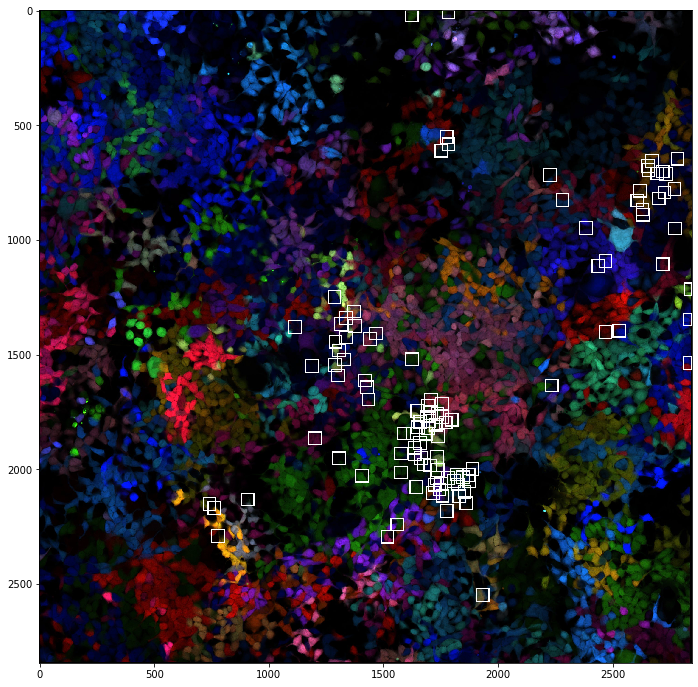

In [30]:
image = np.array(Image.open('test files\detected_image.jpg'))
imageMask(image,df2[df2['channel_bool']=='Y'])

In [32]:
df2.head()

cell index  centroid_x  centroid_y  channel_nucleus  nucleus_area  \
0  cell_4094        1790        1701       16423.4824         60.48   
1  cell_6018        1403        2468       19012.8965         43.56   
2  cell_3974        1748        1648       18245.6543         60.48   
3  cell_3246        1341        1338       15537.3330         44.28   
4  cell_6437         892        2631       22270.4160         53.64   

   nucleus_circularity  channel_red  channel_green  channel_blue  channel_sum  \
0               0.7374   32836.9531      7076.6528    10444.4297   50358.0356   
1               0.8614   36123.5312      7013.6982    12938.2305   56075.4599   
2               0.8846   28267.0293      7463.8013     8287.4385   44018.2691   
3               0.6797   32358.6816     10671.3652     8053.0078   51083.0546   
4               0.8259   29786.0000     10328.5908     6969.8379   47084.4287   

   ...  rgb_green   rgb_blue   rel_red  rel_green  rel_blue  c_label  \
0  ...  35.834330  52.887877  0.504199   0.114357  0.159398        9   
1  ...  31.894398  58.835876  0.554663   0.113340  0.197457        9   
2  ...  43.238168  48.009539  0.434030   0.120614  0.126479        9   
3  ...  53.270075  40.199573  0.496856   0.172447  0.122901        9   
4  ...  55.937615  37.747270  0.457353   0.166908  0.106370        9   

   c_probability  cluster_bool  coord_bool  channel_bool  
0       0.715688             Y           Y             Y  
1       0.594218             Y           N             Y  
2       0.813693             Y           Y             Y  
3       0.652804             Y           Y             Y  
4       0.747828             Y           N             Y  

[5 rows x 24 columns]